
### Data
* Access data: [Metabolomics reveals impaired maturation of HDL particles in adolescents with hyperinsulinaemic androgen excess](https://www.ebi.ac.uk/metabolights/MTBLS103)
* Paper: [Metabolomics reveals impaired maturation of HDL particles in adolescents with hyperinsulinaemic androgen excess](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4477239/)
* This dataset is also used in this paper: [CliqueMS: a computational tool for annotating in-source metabolite ions from LC-MS untargeted metabolomics data based on a coelution similarity network ](https://academic.oup.com/bioinformatics/article/35/20/4089/5418951)

### Resources

* [Tutorial in bioinformatics for Mass spectrometry analysis](https://www.mygoblet.org/training-portal/materials/bioinformatics-ms-analysis) . Pay attention on slide 26! This is the workflow that you will have to implement!
* [Interesting dicussion on reddit on the basics of data challenges in mass spectroscopy](https://www.reddit.com/r/massspectrometry/comments/byd2d7/details_of_ms_data/?ref=readnext)
* [Mass spectrometry data format page on wikipedia](https://en.wikipedia.org/wiki/Mass_spectrometry_data_format)
* Pyteomics
   * [Overview](https://www.biostars.org/p/66772/) , [also from pypi](https://pypi.org/project/pyteomics/)
   * [Tutorial: Parsing data with pyteomics](https://pyteomics.readthedocs.io/en/latest/data.html)
   * [How to plot and visualize a peak with pyteomics](https://pubs.acs.org/doi/abs/10.1021/acs.jproteome.8b00717)

* pyQms, generalized, fast and accurate mass spectrometry data quantification   https://github.com/pyQms/pyQms 
   * [Download Instructions and Documentations](https://pyqms.readthedocs.io/en/latest/intro.html#download-instructions)
   * Paper: [pyQms enables universal and accurate quantification of mass spectrometry data](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5629261/)
   * How to match a pick list with PyQms: https://pyqms.readthedocs.io/en/latest/quick_start.html#matching-a-peak-list 
* [pymzML - an interface between Python and mzML Mass spectrometry Files](https://github.com/pymzml/pymzML) 


### Install tools
```bash
pip install lxml numpy matplotlib pyteomics
pip install pyqms 
```

pymqs also installs pymzML

### Reading a mzXML file

In [3]:
from pyteomics import mzxml
f = mzxml.MzXML('C18_CON_BASA_567795.mzXML')


In [4]:
# Get the first entry:
s = next(f)

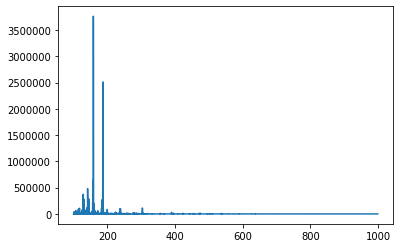

In [6]:
# Visualize the peak:
import matplotlib.pyplot as plt 

plt.plot(s['m/z array'], s['intensity array'], )

### Perform protein identification with pyQms

In [8]:
import pyqms

# Create a peak list
peak_list = list(zip(s['m/z array'], s['intensity array']))

# Creare a library
lib = pyqms.IsotopologueLibrary(
    molecules  = [ 'DDSPDLPK' ],
    charges    = [ 2 ],
)

> Metabolic labels        > {'15N': [0.0]}
> Fixed labels            > {}
> Charges                 > [2]
> Machine ppm offset      > 0.0
> Label percentile tuples > [(('N', '0.000'),)]
> Creating binomial cache > [9 ... 59]
> Building     C element tree with a depth of   37, labeling percentile: 0.000
> Building     H element tree with a depth of   59, labeling percentile: 0.000
> Building     N element tree with a depth of    9, labeling percentile: 0.000
> Building     O element tree with a depth of   16, labeling percentile: 0.000
> Building isotopologue 00001/00001
> Execution time 0.01 seconds
> Created 1 match sets, total mz range [ 443.71126 ..  447.22112]


Match peak with peak list

In [17]:
results = lib.match_all(
    mz_i_list = peak_list,
    #spec_id   = 1165,
    #spec_rt   = 29.10,
    results   = None
)
    

In [16]:
results

{}